In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys, os
sys.path.append('/home/hrai/codes/hpe_library')
from hpe_library.lib_import import *
from hpe_library. my_utils import *
os.chdir('/home/hrai/codes/MotionBERT/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pkl_root = '/home/hrai/codes/MotionBERT/data/motion3d'
converted_pkl_root = '/home/hrai/codes/MotionBERT/data/motion3d/MB3D_f243s81'
pkl_list = os.listdir(pkl_root)
converted_pkl_list = os.listdir(converted_pkl_root)
pkl_list, converted_pkl_list

(['h36m_gt_no_factor.pkl',
  'fit3d_gt_all_train_except_target_action.pkl',
  'h36m_sh_conf_cam_source_final.pkl',
  'MB3D_f243s81',
  'random_limb_pkl',
  'h36m_gt_test_trans-0.5,0,-0.5_pkl',
  'h36m_gt_pkl',
  'kookmin_total_with_kookmin_setting_s0258_test.pkl'],
 ['FIT3D-GT-ALL_TRAIN_EXCEPT_TARGET_ACTION',
  'H36M-SH',
  'H36M-GT-CAM_NO_FACTOR',
  'H36M-SH.zip',
  'H36M-GT-WORLD_NO_FACTOR',
  'KOOKMIN_TOTAL_WITH_KOOKMIN_SETTING_S0258_TEST',
  'RANDOM_LIMB_TRAIN1600_TEST400'])

In [5]:
target_pkl = 'h36m_gt.pkl'
target_converted_pkl = 'H36M-GT-CAM_NO_FACTOR'

In [6]:
target_converted_pkl_list = natsorted(glob(os.path.join(converted_pkl_root, target_converted_pkl, 'train', '*.pkl')))

In [7]:
pkl_data = readpkl(os.path.join(pkl_root, target_pkl))
converted_pkl_data = readpkl(target_converted_pkl_list[0])

In [8]:
pkl_data.keys(), converted_pkl_data.keys()

(dict_keys(['train', 'test']), dict_keys(['data_input', 'data_label']))

In [9]:
pkl_data['train'].keys(), converted_pkl_data['data_label'].shape

(dict_keys(['joint_2d', 'confidence', 'camera_name', 'action', 'source', 'frame', 'world_3d', 'cam_3d', 'cam_param']),
 (243, 17, 3))

### Visualize data

In [12]:
gt_3d = pkl_data['train']['cam_3d'][:243].copy()
input_2d = pkl_data['train']['joint_2d'][:243].copy()
converted_gt_3d = converted_pkl_data['data_label'].copy()

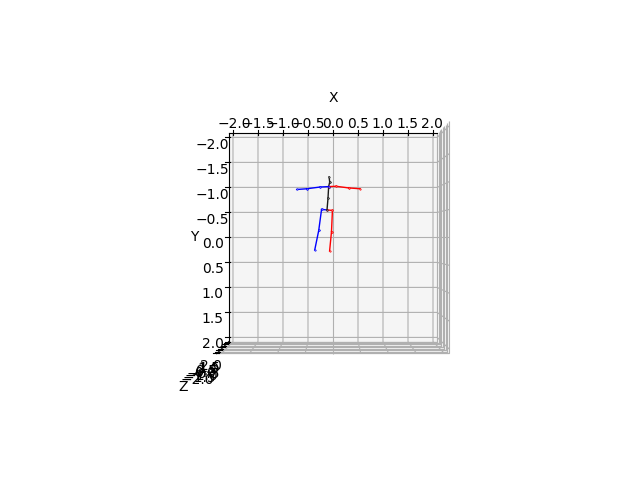

In [13]:
frame = 0

%matplotlib widget
fig = plt.figure(0)
fig.clear()
ax = axes_3d(fig, view=(-90, -90))
draw_3d_pose(ax, gt_3d[frame]) 
#draw_3d_pose(ax, converted_gt_3d[frame], color='r')
plt.show()